In [41]:
from src.CipherBreaker import CipherBreaker
from src.CipherUtils import (
    TextDecoder,
    TextEncoder,
    CipherGenerator,
    TextPreProcessor,
)
from src.ProbabilityMatrix import ProbabilityMatrix

In [42]:
# create instances of my beautiful classes

cipher_generator = CipherGenerator()
preprocess = TextPreProcessor()
text_encoder = TextEncoder()
text_decoder = TextDecoder()

In [43]:
# List of text file paths to build our corpus (where we learn the transitions probs)

file_paths = [
    "texts/moby_dick.txt",
    "texts/shakespeare.txt",
    "texts/james-joyce-a-portrait-of-the-artist-as-a-young-man.txt",
    "texts/james-joyce-dubliners.txt",
    "texts/james-joyce-ulysses.txt",
]

texts = []
for file_path in file_paths:
    with open(file_path, "r") as file:
        texts.append(file.read())

corpus = "".join(texts)

In [44]:
# preprocess the text, removing extra-characters

corpus = preprocess.lower(corpus)
unknown_chars = preprocess.unknown_chars(corpus)
# print(unknown_chars)
corpus = preprocess.remove_unknown_chars(corpus, unknown_chars=unknown_chars)
corpus = preprocess.remove_additional_spaces(corpus)

preprocess.save_text(
    corpus
)  # save text after preprocessing inside text_preprocessed.txt

In [45]:
# compute the transition probs

probability_matrix = ProbabilityMatrix(corpus)
probability_matrix.compute_probability_table()

In [46]:
min(probability_matrix.probability_table.values())

1.2227497980017334e-07

In [47]:
probability_matrix.save_all_2_chars()
probability_matrix.save_probability_table()

In [48]:
# some text to try

text = "There were better sense in the sad mechanic exercise of determining the reason of its absence where it is not. In the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love; there are at least five with whom, as it seems to me, no man of taste and spirit can help doing so."
text = "I do not believe a word of it, my dear. If he had been so very agreeable, he would have talked to Mrs. Long. But I can guess how it was"
text = "Your plan is a good one,” replied Elizabeth, “where nothing is in question but the desire of being well married; and if I were determined to get a rich husband, or any husband, I dare say I should adopt it. But these are not Jane’s feelings"
text = "she is not acting by design. As yet she cannot even be certain of the degree of her own regard, nor of its reasonableness. She has known him only a fortnight. She danced four dances with him at Meryton; she saw him one morning at his own house, and has since dined in company with him four times."

In [49]:
# encode and decode a sample text with a generated cipher

text = preprocess.lower(text)
text = preprocess.remove_unknown_chars(
    text, unknown_chars=preprocess.unknown_chars(text)
)
text = preprocess.remove_additional_spaces(text)


cipher = cipher_generator.generate_cipher()

encoded_text = text_encoder.encode_text(text, cipher)
decoded_text = text_decoder.decode_text(encoded_text, cipher)

print("Original Text:", text)
print("Encoded Text:", encoded_text)
print("Decoded Text:", decoded_text)

Original Text: she is not acting by design as yet she cannot even be certain of the degree of her own regard nor of its reasonableness she has known him only a fortnight she danced four dances with him at meryton she saw him one morning at his own house and has since dined in company with him four times
Encoded Text: sjw hs ofa veahoz cq xwshzo vs qwa sjw evoofa wpwo cw ewgavho fn ajw xwzgww fn jwg fdo gwzvgx ofg fn has gwvsfovcywowss sjw jvs iofdo jhu foyq v nfgaohzja sjw xvoewx nftg xvoews dhaj jhu va uwgqafo sjw svd jhu fow ufgohoz va jhs fdo jftsw vox jvs shoew xhowx ho efurvoq dhaj jhu nftg ahuws
Decoded Text: she is not acting by design as yet she cannot even be certain of the degree of her own regard nor of its reasonableness she has known him only a fortnight she danced four dances with him at meryton she saw him one morning at his own house and has since dined in company with him four times


In [51]:
# break the cipher with MCMC

cipher_breaker = CipherBreaker(
    starting_cipher=cipher_generator.generate_cipher(),
    ciphered_text=encoded_text,
    probability_table=probability_matrix.probability_table,
)

cipher_breaker.break_cipher(iterations=50000, print_interval=100)

Iter 0: jsl vj tei odivtp gb mljvpt oj bli jsl dottei lklt gl dlziovt eq isl mlpzll eq slz eat zlpozm tez eq vij zlojetogrltljj jsl soj fteat svx etrb o qezitvpsi jsl motdlm qewz motdlj avis svx oi xlzbiet jsl joa svx etl xeztvtp oi svj eat sewjl otm soj jvtdl mvtlm vt dexyotb avis svx qewz ivxlj
Iter 100: the it nol adling vy setign at yel the dannol ewen ve derlain of lhe segree of her oun regars nor of ilt reatonavkenett the hat znoun him onky a forlnighl the sandes focr sandet uilh him al merylon the tau him one morning al hit oun hocte ans hat tinde sines in dompany uilh him focr limet
Iter 200: the it nos acsing bl detign at les the cannos even be cersain of she degree of her own regard nor of ist reatonabyenett the hat known him onyl a forsnighs the danced four dancet wish him as merlson the taw him one morning as hit own houte and hat tince dined in comqanl wish him four simet
Iter 300: the it nos adsing by letign at yes the dannos even be dersain of she legree of her own regar

['v',
 'c',
 'e',
 'x',
 'w',
 'n',
 'z',
 'j',
 'h',
 'm',
 'b',
 'y',
 'u',
 'o',
 'f',
 'r',
 'k',
 'g',
 'a',
 's',
 't',
 'p',
 'd',
 'l',
 'q',
 'i']

In [52]:
dict(sorted(cipher_breaker.history.items(), key=lambda item: item[1], reverse = True)) # Print the decoded texts with highest log-likelihood first

{'the it nos acsing by detign at yes the cannos even be cersain of she degree of her own regard nor of ist reatonablenett the hat known him only a forsnighs the danced four dancet wish him as meryson the taw him one morning as hit own houte and hat tince dined in comqany wish him four simet': -1468.6533753141293,
 'the it nos acsing by detign at yes the cannos even be cersain of she degree of her own regard nor of ist reatonablenett the hat known him only a forsnighs the danced four dancet wish him as meryson the taw him one morning as hit own houte and hat tince dined in company wish him four simet': -1469.2531619587019,
 'she is not acting by design as yet she cannot even be certain of the degree of her own regard nor of its reasonableness she has known him only a fortnight she danced four dances with him at meryton she saw him one morning at his own house and has since dined in comqany with him four times': -1469.411590728145,
 'the it nos acsing by detign at yes the cannos even be 

MovieWriter imagemagick unavailable; using Pillow instead.


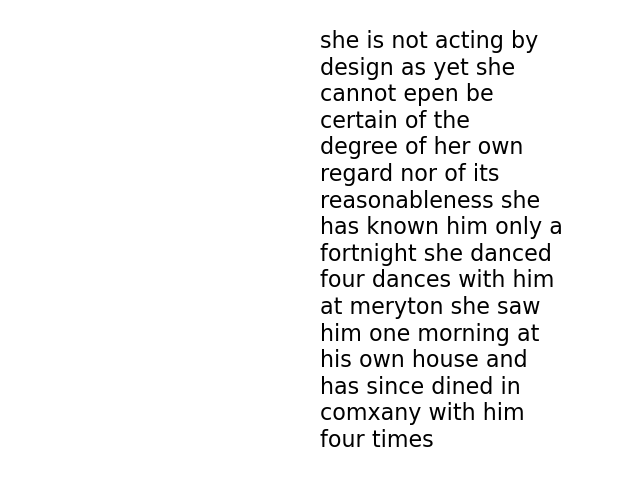

In [27]:
cipher_breaker.generate_animation(filename="she is not.gif")